## Using the map function

##### A map function is usually used to convert columns into another equivalent columns. It can be used to convert the Categorical data column to a 0 and 1 value column. Map() is a Series Method.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
% matplotlib inline
import seaborn as sns

In [4]:
train = pd.read_csv('http://bit.ly/kaggletrain')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train['sex_num'] = train['Sex'].map({'female':0,'male':1})

In [17]:
#Just an example to get some specific indexed numbers
train.iloc[10:15][['sex_num','Sex']]

,sex_num,Sex
10,0,female
11,0,female
12,1,male
13,1,male
14,0,female


In [18]:
train[['sex_num','Sex']].head(6)

,sex_num,Sex
0,1,male
1,0,female
2,0,female
3,0,female
4,1,male
5,1,male


###### This is such a nice way and the most usually used method to convert the categorical variable

### Using the Apply() function. Using this, a function can be made to apply to all the rows of a column of a dataframe. 

##### Creating a new column in the Train dataframe specially for the last name.

In [24]:
train['LastName'] = train['Name'].apply(lambda x:x.split(',')[0]).head()

In [25]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num,LastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,Allen


In [34]:
# Using the apply() function, which affects the function to each of the values in the column.  
train['count_name_length'] = train['Name'].apply(len)

In [36]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num,LastName,count_name_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund,23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Cumings,51


In [37]:
# apply function of the fare column
train['Fare_approx'] = train['Fare'].apply(np.ceil)

In [38]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_num,LastName,count_name_length,Fare_approx
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Braund,23,8.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,Cumings,51,72.0


## Exploring the data of Alcohol Consumption in various countries

In [2]:
drinks = pd.read_csv('http://bit.ly/drinksbycountry')

In [42]:
drinks.head(3)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa


In [46]:
drinks1 = drinks[['beer_servings','spirit_servings','wine_servings','country']]

In [47]:
drinks1.head(3)

,beer_servings,spirit_servings,wine_servings,country
0,0,0,0,Afghanistan
1,89,132,54,Albania
2,25,0,14,Algeria


In [61]:
drinks1[['beer_servings','spirit_servings','wine_servings']].apply(max)

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

### Exploring the countries with the maximum values found in the previous result

In [80]:
# Top 10 beer consuming countries. Strange to see Namibia. May be an error.
drinks[['country','beer_servings']].sort_values(by='beer_servings',ascending=False).head(10)

,country,beer_servings
117,Namibia,376
45,Czech Republic,361
62,Gabon,347
65,Germany,346
98,Lithuania,343
135,Poland,343
188,Venezuela,333
81,Ireland,313
129,Palau,306
140,Romania,297


In [63]:
drinks[drinks['beer_servings']==376]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
117,Namibia,376,3,1,6.8,Africa


In [65]:
drinks[drinks['spirit_servings']==438]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
68,Grenada,199,438,28,11.9,North America


In [66]:
drinks[drinks['wine_servings']==370]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
61,France,127,151,370,11.8,Europe


In [73]:
# Known countries for the Highest beer consumption
drinks[(drinks['country']=='Czech Republic') | (drinks['country']=='Germany') | (drinks['beer_servings']==376)]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
45,Czech Republic,361,170,134,11.8,Europe
65,Germany,346,117,175,11.3,Europe
117,Namibia,376,3,1,6.8,Africa


In [1]:
import pandas as pd
import numpy as np

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Conditional Selection

In [18]:
def name(x):
    if 'mrs' in x.lower():
        return True 
    else:
        return False   

In [16]:
train[train['Name'].apply(lambda x: name(x))].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S


In [23]:
# People with Mrs. as initial are 112 in total.
train[train['Name'].apply(lambda x: name(x))]['Age'].count()

112

In [19]:
def name2(x):
    if 'miss' in x.lower():
        return True 
    else:
        return False   

In [22]:
train[train['Name'].apply(lambda x: name2(x))].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q


In [25]:
# People with Miss as initial are 146 in total.
train[train['Name'].apply(lambda x: name2(x))]['Age'].count()

146

In [35]:
#Practicing with conditional selection
def numb(x):
    if '16' in x:
        return True 
    else:
        return False 

In [36]:
train[train['Ticket'].apply(lambda x: numb(x))].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
79,80,1,3,"Dowdell, Miss. Elizabeth",female,30.0,0,0,364516,12.4750,NaN,S
117,118,0,2,"Turpin, Mr. William John Robert",male,29.0,1,0,11668,21.0000,NaN,S


In [49]:
#Exploring how many tickets had a price of more than $100
train[train['Fare']>100]['PassengerId'].count()

#Result: Out of 891 of total passengers, 53 had purchase a ticket of more than $100

53

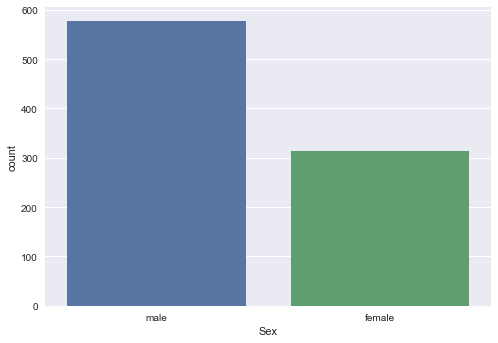

In [48]:
# Demographics on Sex
sns.countplot(x='Sex', data=train)